<a href="https://colab.research.google.com/github/Nawshin-25/Saint_Martin/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

# pH

In [ ]:
file_name = '/content/drive/MyDrive/Data/ST_pH.nc'
ds = xr.open_dataset(file_name)
print(ds)

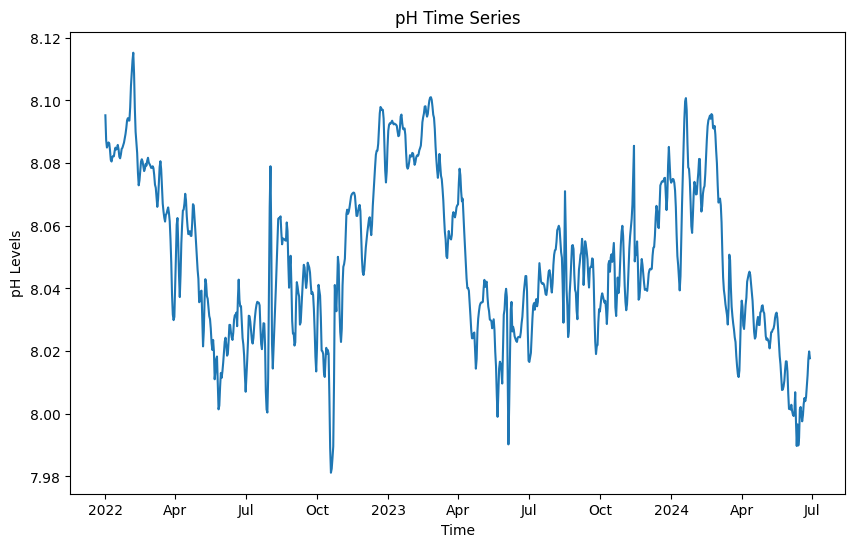

In [ ]:
plt.figure(figsize=(10, 6))
pH_time_data = ds['ph'].isel(depth=0, latitude=0, longitude=0)  # First depth, lat, lon
pH_time_data.plot()
plt.title('pH Time Series')
plt.xlabel('Time')
plt.ylabel('pH Levels')
plt.show()

# Chlorophyll

In [ ]:
file_name = '/content/drive/MyDrive/Data/Chlorophyl.nc'
ds = xr.open_dataset(file_name)
print(ds)

<xarray.Dataset> Size: 25MB
Dimensions:          (time: 9040, latitude: 12, longitude: 19)
Coordinates:
  * latitude         (latitude) float32 48B 20.27 20.31 20.35 ... 20.69 20.73
  * longitude        (longitude) float32 76B 91.6 91.65 91.69 ... 92.31 92.35
  * time             (time) datetime64[ns] 72kB 2000-01-01 ... 2024-09-30
Data variables:
    CHL              (time, latitude, longitude) float32 8MB ...
    CHL_uncertainty  (time, latitude, longitude) float32 8MB ...
    flags            (time, latitude, longitude) float32 8MB ...
Attributes:
    Conventions:       CF-1.11
    comment:           average
    contact:           servicedesk.cmems@acri-st.fr
    history:           Created using software developed at ACRI-ST
    institution:       ACRI
    references:        http://www.globcolour.info GlobColour has been origina...
    source:            surface observation
    subset:datasetId:  cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_...
    subset:date:       2024-1

In [ ]:
chl_data = ds['CHL'].sel(time=slice("2001-01-01", "2020-12-31"))
chl_data['time'] = pd.to_datetime(chl_data['time'].values)

winter = chl_data.sel(time=chl_data['time'].dt.month.isin([11, 12])).mean(dim=['latitude', 'longitude'])
premonsoon = chl_data.sel(time=chl_data['time'].dt.month.isin([2, 3, 4, 5])).mean(dim=['latitude', 'longitude'])
monsoon = chl_data.sel(time=chl_data['time'].dt.month.isin([6, 7, 8, 9])).mean(dim=['latitude', 'longitude'])
post_monsoon = chl_data.sel(time=chl_data['time'].dt.month.isin([10])).mean(dim=['latitude', 'longitude'])

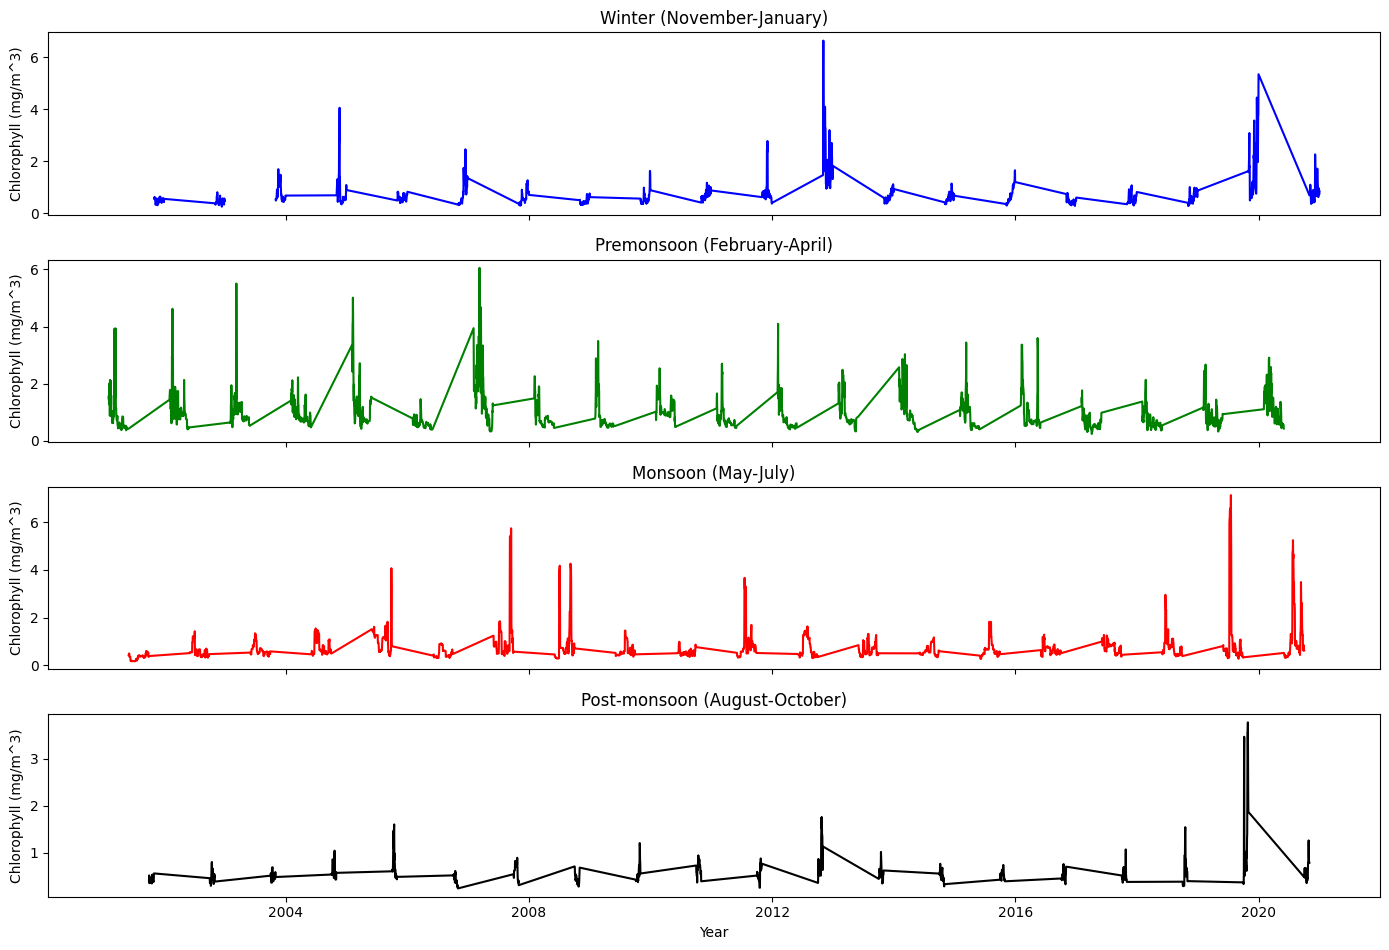

In [ ]:
fig, axs = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

axs[0].plot(winter['time'], winter, color='blue')
axs[0].set_title('Winter (November-January)')
axs[0].set_ylabel('Chlorophyll (mg/m^3)')

axs[1].plot(premonsoon['time'], premonsoon, color='green')
axs[1].set_title('Premonsoon (February-April)')
axs[1].set_ylabel('Chlorophyll (mg/m^3)')

axs[2].plot(monsoon['time'], monsoon, color='red')
axs[2].set_title('Monsoon (May-July)')
axs[2].set_ylabel('Chlorophyll (mg/m^3)')

axs[3].plot(post_monsoon['time'], post_monsoon, color='black')
axs[3].set_title('Post-monsoon (August-October)')
axs[3].set_ylabel('Chlorophyll (mg/m^3)')
axs[3].set_xlabel('Year')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
winter_mean = winter.mean(dim='time')
premonsoon_mean = premonsoon.mean(dim='time')
monsoon_mean = monsoon.mean(dim='time')
post_monsoon_mean = post_monsoon.mean(dim='time')

winter_anomaly = winter - winter_mean
premonsoon_anomaly = premonsoon - premonsoon_mean
monsoon_anomaly = monsoon - monsoon_mean
post_monsoon_anomaly = post_monsoon - post_monsoon_mean

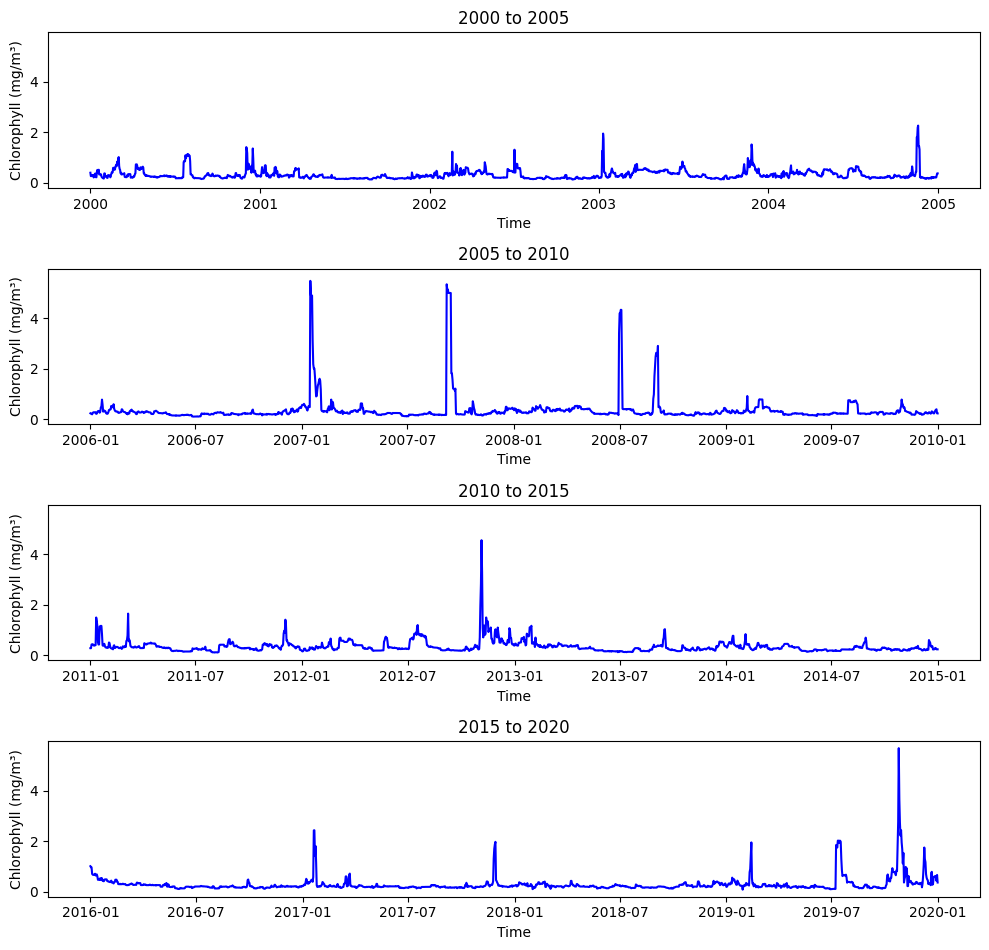

In [ ]:
Chl_time_data = ds['CHL'].isel(latitude=0, longitude=0)
time_index = pd.to_datetime(Chl_time_data['time'].values)
chl_values = Chl_time_data.values

time_ranges = [
    (time_index >= '2000-01-01') & (time_index < '2005-01-01'),
    (time_index >= '2006-01-01') & (time_index < '2010-01-01'),
    (time_index >= '2011-01-01') & (time_index < '2015-01-01'),
    (time_index >= '2016-01-01') & (time_index < '2020-01-01')
]

# Plot each 8-year period in a separate subplot
fig, axes = plt.subplots(4, 1, figsize=(10, 10), sharey=True)
for i, time_range in enumerate(time_ranges):
    axes[i].plot(time_index[time_range], chl_values[time_range], color='b')
    axes[i].set_title(f'{2000 + i*5} to {2005 + i*5}')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Chlorophyll (mg/m³)')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the main title
plt.show()

# Primary Productivity

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
file_name = '/content/drive/MyDrive/Data/ST_PP.nc'
ds = xr.open_dataset(file_name)
print(ds)

<xarray.Dataset> Size: 385kB
Dimensions:    (depth: 50, latitude: 1, longitude: 1, time: 944)
Coordinates:
  * depth      (depth) float32 200B 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 4B 20.5
  * longitude  (longitude) float32 4B 92.25
  * time       (time) datetime64[ns] 8kB 2021-11-28 2021-11-29 ... 2024-06-28
Data variables:
    nppv       (time, depth, latitude, longitude) float32 189kB ...
    o2         (time, depth, latitude, longitude) float32 189kB ...
Attributes:
    Conventions:       CF-1.11
    contact:           https://marine.copernicus.eu/contact
    credit:            E.U. Copernicus Marine Service Information (CMEMS)
    institution:       Mercator Ocean
    producer:          CMEMS - Global Monitoring and Forecasting Centre
    references:        http://marine.copernicus.eu
    subset:datasetId:  cmems_mod_glo_bgc-bio_anfc_0.25deg_P1D-m_202311
    subset:date:       2024-06-24T08:34:39.576Z
    subset:productId:  GLOBAL_ANALYSISFORE

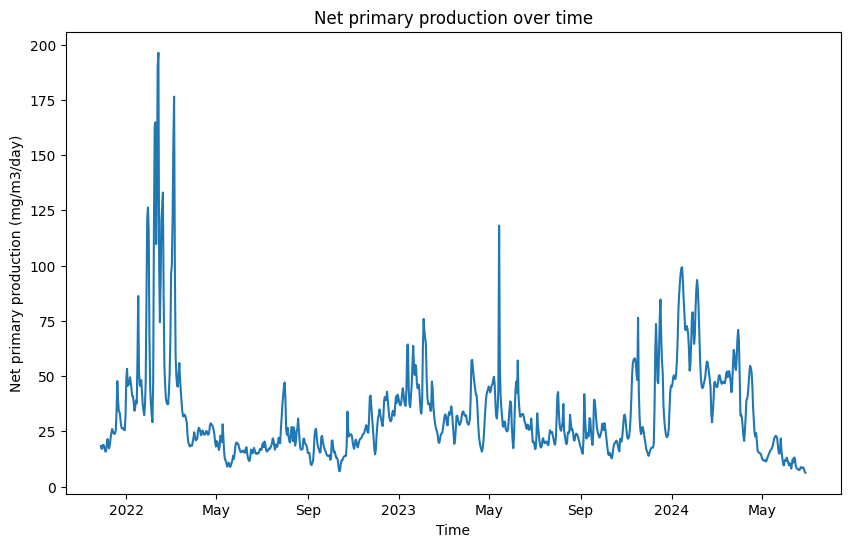

In [ ]:
plt.figure(figsize=(10, 6))
Chl_time_data = ds['nppv'].isel(depth=0, latitude=0, longitude=0)  # First depth, lat, lon
Chl_time_data.plot()
plt.title('Net primary production over time')
plt.xlabel('Time')
plt.ylabel('Net primary production (mg/m3/day)')
plt.show()

# **ReAnalysis**

In [ ]:
file_name = '/content/drive/MyDrive/Data/SST.nc'
ds = xr.open_dataset(file_name)
print(ds)

<xarray.Dataset> Size: 29MB
Dimensions:    (time: 7852, latitude: 6, longitude: 14, depth: 1)
Coordinates:
  * depth      (depth) float32 4B 0.494
  * latitude   (latitude) float32 24B 20.25 20.33 20.42 20.5 20.58 20.67
  * longitude  (longitude) float32 56B 91.25 91.33 91.42 ... 92.17 92.25 92.33
  * time       (time) datetime64[ns] 63kB 2000-01-01 2000-01-02 ... 2021-06-30
Data variables:
    bottomT    (time, latitude, longitude) float32 3MB ...
    mlotst     (time, latitude, longitude) float32 3MB ...
    siconc     (time, latitude, longitude) float32 3MB ...
    sithick    (time, latitude, longitude) float32 3MB ...
    so         (time, depth, latitude, longitude) float32 3MB ...
    thetao     (time, depth, latitude, longitude) float32 3MB ...
    uo         (time, depth, latitude, longitude) float32 3MB ...
    usi        (time, latitude, longitude) float32 3MB ...
    vo         (time, depth, latitude, longitude) float32 3MB ...
    vsi        (time, latitude, longitude) floa

In [ ]:
SST_data = ds['thetao'].sel(time=slice("2001-01-01", "2020-12-31"))
SST_data['time'] = pd.to_datetime(SST_data['time'].values)

winter = SST_data.sel(time=SST_data['time'].dt.month.isin([11, 12, 1])).mean(dim=['latitude', 'longitude'])
premonsoon = SST_data.sel(time=SST_data['time'].dt.month.isin([2, 3, 4])).mean(dim=['latitude', 'longitude'])
monsoon = SST_data.sel(time=SST_data['time'].dt.month.isin([5, 6, 7])).mean(dim=['latitude', 'longitude'])
post_monsoon = SST_data.sel(time=SST_data['time'].dt.month.isin([8, 9, 10])).mean(dim=['latitude', 'longitude'])

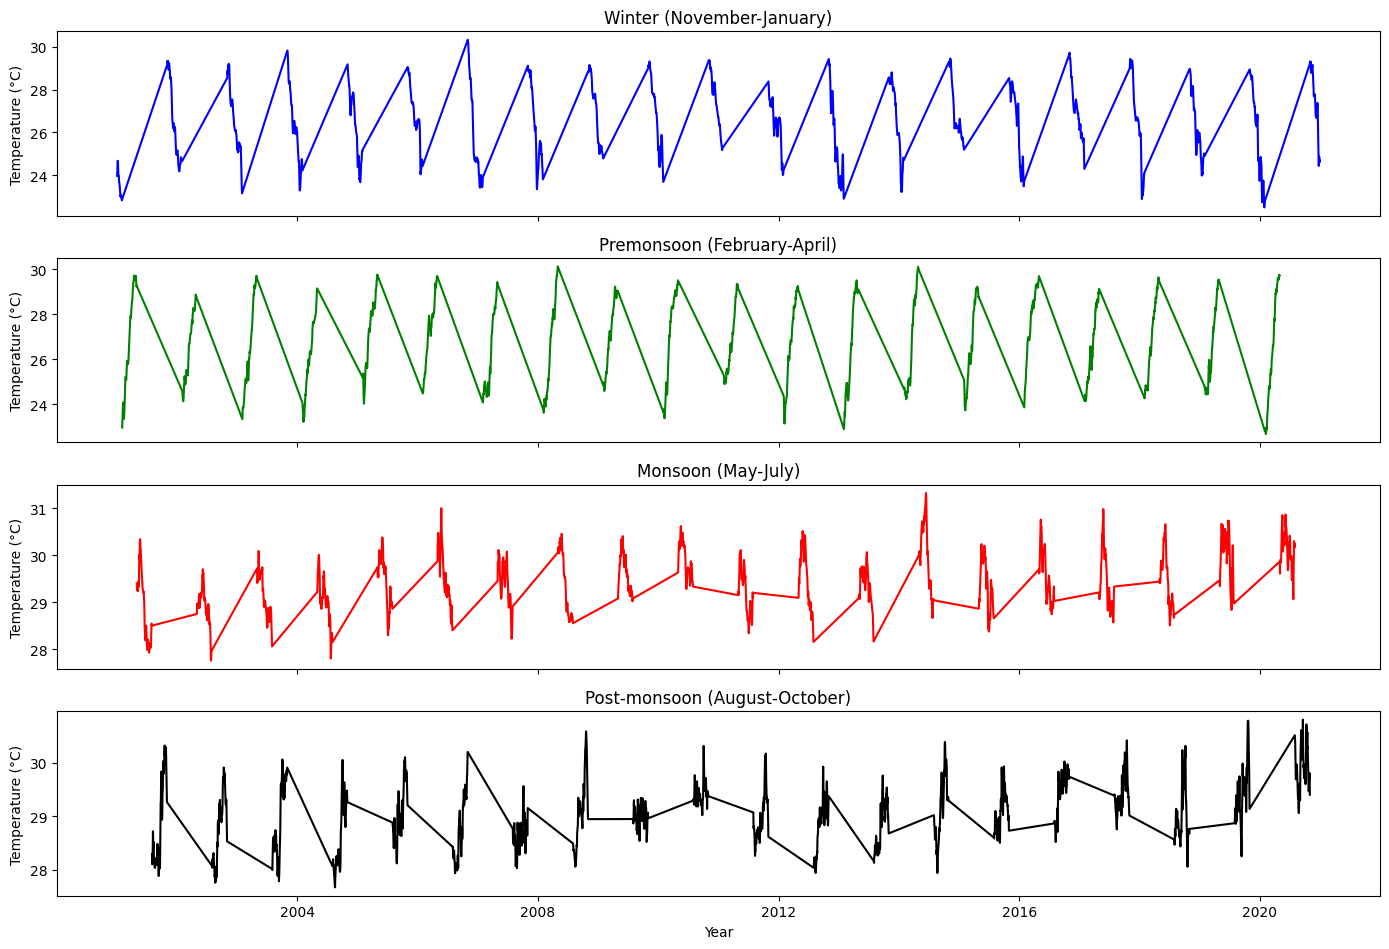

In [ ]:
fig, axs = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

axs[0].plot(winter['time'], winter, color='blue')
axs[0].set_title('Winter (November-January)')
axs[0].set_ylabel('Temperature (°C)')

axs[1].plot(premonsoon['time'], premonsoon, color='green')
axs[1].set_title('Premonsoon (February-April)')
axs[1].set_ylabel('Temperature (°C)')

axs[2].plot(monsoon['time'], monsoon, color='red')
axs[2].set_title('Monsoon (May-July)')
axs[2].set_ylabel('Temperature (°C)')

axs[3].plot(post_monsoon['time'], post_monsoon, color='black')
axs[3].set_title('Post-monsoon (August-October)')
axs[3].set_ylabel('Temperature (°C)')
axs[3].set_xlabel('Year')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
SST_time_data = ds['thetao'].isel(latitude=0, longitude=0)
time_index = pd.to_datetime(SST_time_data['time'].values)
SST_values = SST_time_data.values

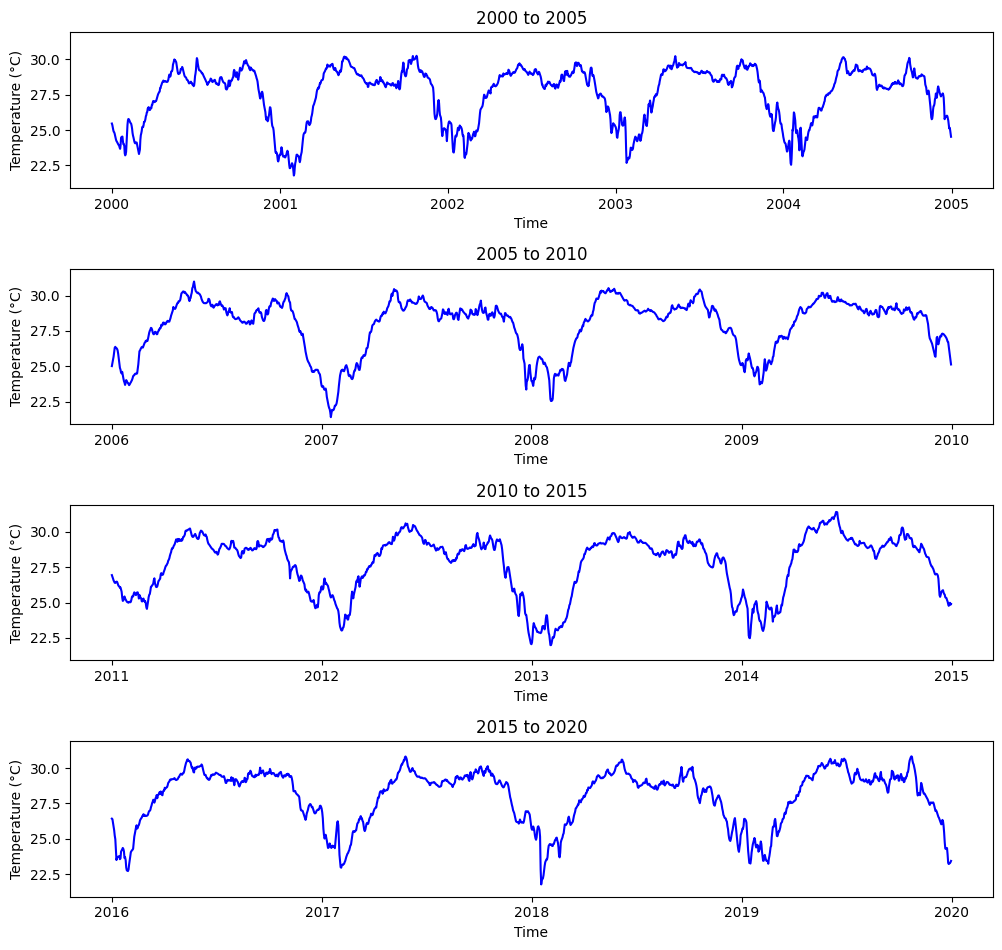

In [ ]:
time_ranges = [
    (time_index >= '2000-01-01') & (time_index < '2005-01-01'),
    (time_index >= '2006-01-01') & (time_index < '2010-01-01'),
    (time_index >= '2011-01-01') & (time_index < '2015-01-01'),
    (time_index >= '2016-01-01') & (time_index < '2020-01-01')
]

fig, axes = plt.subplots(4, 1, figsize=(10, 10), sharey=True)
for i, time_range in enumerate(time_ranges):
    axes[i].plot(time_index[time_range], SST_values[time_range], color='b')
    axes[i].set_title(f'{2000 + i*5} to {2005 + i*5}')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Temperature (°C)')

    # Set major ticks to be at the beginning of each year and format labels to show only the year
    axes[i].xaxis.set_major_locator(mdates.YearLocator(1))
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the main title
plt.show()

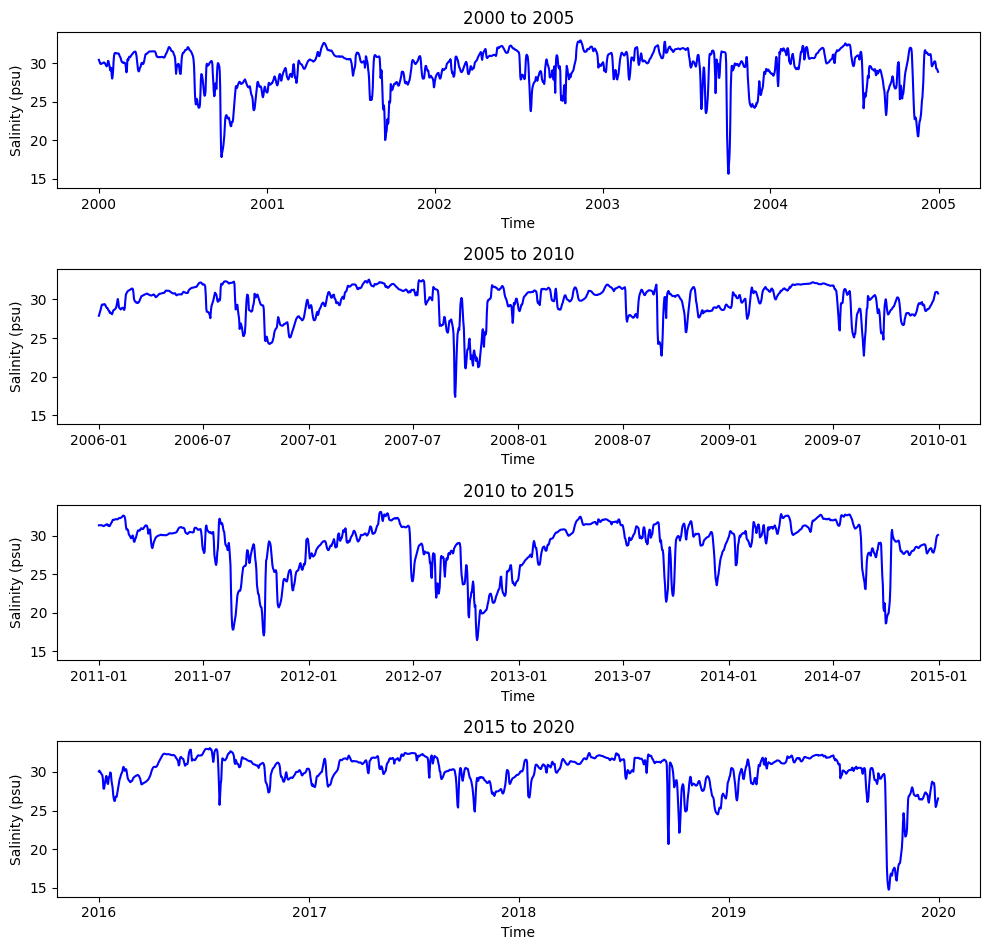

In [ ]:
SSS_time_data = ds['so'].isel(latitude=0, longitude=0)
time_index = pd.to_datetime(SSS_time_data['time'].values)
SSS_values = SSS_time_data.values

time_ranges = [
    (time_index >= '2000-01-01') & (time_index < '2005-01-01'),
    (time_index >= '2006-01-01') & (time_index < '2010-01-01'),
    (time_index >= '2011-01-01') & (time_index < '2015-01-01'),
    (time_index >= '2016-01-01') & (time_index < '2020-01-01')
]

# Plot each 8-year period in a separate subplot
fig, axes = plt.subplots(4, 1, figsize=(10, 10), sharey=True)
for i, time_range in enumerate(time_ranges):
    axes[i].plot(time_index[time_range], SSS_values[time_range], color='b')
    axes[i].set_title(f'{2000 + i*5} to {2005 + i*5}')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Salinity (psu)')

axes[i].xaxis.set_major_locator(mdates.YearLocator(1))
axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the main title
plt.show()

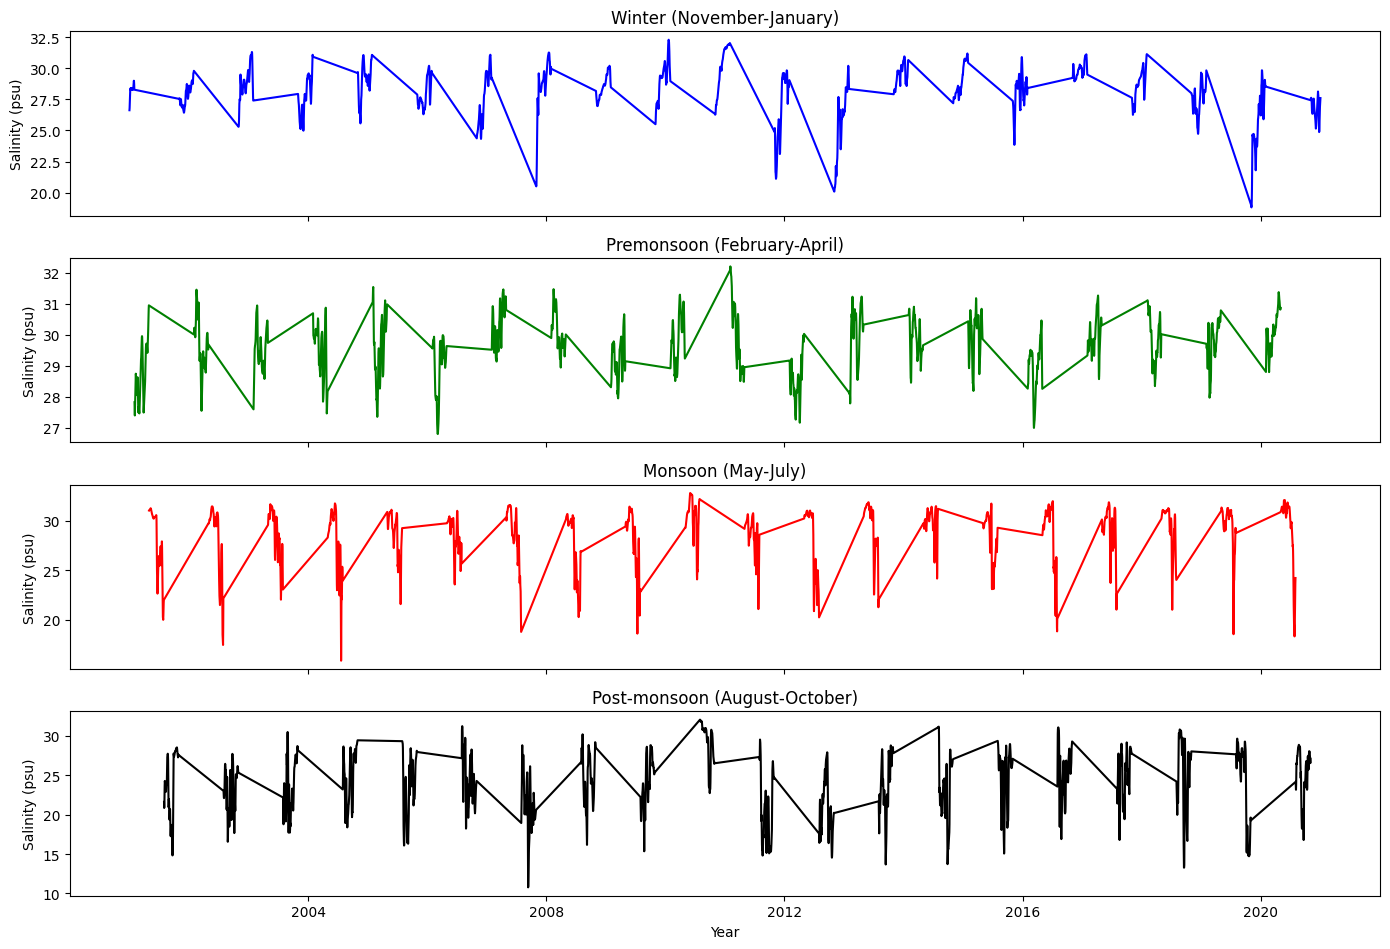

In [ ]:
SSS_data = ds['so'].sel(time=slice("2001-01-01", "2020-12-31"))
SSS_data['time'] = pd.to_datetime(SST_data['time'].values)

winter = SSS_data.sel(time=SSS_data['time'].dt.month.isin([11, 12, 1])).mean(dim=['latitude', 'longitude'])
premonsoon = SSS_data.sel(time=SSS_data['time'].dt.month.isin([2, 3, 4])).mean(dim=['latitude', 'longitude'])
monsoon = SSS_data.sel(time=SSS_data['time'].dt.month.isin([5, 6, 7])).mean(dim=['latitude', 'longitude'])
post_monsoon = SSS_data.sel(time=SSS_data['time'].dt.month.isin([8, 9, 10])).mean(dim=['latitude', 'longitude'])

fig, axs = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

axs[0].plot(winter['time'], winter, color='blue')
axs[0].set_title('Winter (November-January)')
axs[0].set_ylabel('Salinity (psu)')

axs[1].plot(premonsoon['time'], premonsoon, color='green')
axs[1].set_title('Premonsoon (February-April)')
axs[1].set_ylabel('Salinity (psu)')

axs[2].plot(monsoon['time'], monsoon, color='red')
axs[2].set_title('Monsoon (May-July)')
axs[2].set_ylabel('Salinity (psu)')

axs[3].plot(post_monsoon['time'], post_monsoon, color='black')
axs[3].set_title('Post-monsoon (August-October)')
axs[3].set_ylabel('Salinity (psu)')
axs[3].set_xlabel('Year')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()